# Week 6 Homework: Collaborative Task 
Group: Charles, Cleighton, & Carter  <br>
06/16/2023 

Dataset: [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023?resource=download)

## PART I: EDA

In [1]:
import pandas as pd
import numpy as np 

In [2]:
ds = pd.read_csv('ds_salaries.csv')
ds.head() 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
ds.shape

(3755, 11)

In [4]:
ds.describe() # summary statistics for numerical values in dataset 

#interesting that remote_ratio is less that 50%, it's definitely an industry that has embraced remote work. 

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
#What types of jobs are in this dataset ? 

ds.job_title.unique()
#wow, many job titles, perhaps it will help to separate the engineers, scientists, managers, analysts, modeler... 


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [6]:
# Grouping the job titles: Analyst, Scientist, Engingeer, Architect, Manager, Other
# Defining a function to categorize job titles
def job_grouper(title):
    title = title.lower()
    if 'manager' in title:
        return 'Manager'
    elif 'architect' in title:
        return 'Architect'
    elif 'engineer' in title:
        return 'Engineer'
    elif 'scientist' in title:
        return 'Scientist'
    elif 'analyst' in title:
        return 'Analyst'
    else:
        return 'Other'

# Checking what percentage of the rows are covered by these groups
print(ds.job_title.str.contains('analyst|scientist|engineer|architect|manager', case = False).sum() / len(ds))

# Making the job_group column
ds['job_group'] = ds.job_title.apply(job_grouper)

# This could be done in a more systematic way by grabbing the last word from each job title and
# finding 5 most common ones, although there might be some problems with titles like 'Head of Data Science'

0.9605858854860186


Text(0.5, 1.0, 'Distribution of Data Science Job Types')

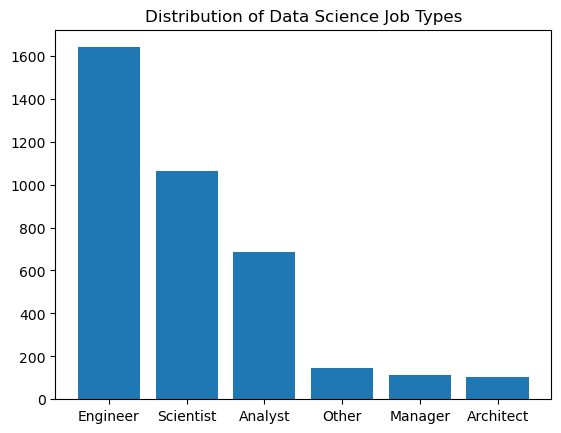

In [7]:
# We can check the distribution for job groups
import matplotlib.pyplot as plt

group_counts = ds.job_group.value_counts()

plt.bar(group_counts.index, group_counts.values)
plt.title('Distribution of Data Science Job Types')

In [8]:
#are there any NaNs in this dataset? 

ds.isnull().sum()   #nope! clean as a whistle

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
job_group             0
dtype: int64

In [9]:
#what is the range of time for this data? 
min = ds.work_year.min() 
max = ds.work_year.max() 

print(f'This dataset describes salaries between {min} and {max}.')

This dataset describes salaries between 2020 and 2023.


In [10]:
#experience_level 

ds.experience_level.unique()

'''
what do these acronyms mean ? [SE, MI, EN, EX]

SE = senior/expert 
MI = mid/intermediate 
EN = entry level 
EX = executive/director 

perhaps we add a column with a numerical scale 1:4 to indicate experience level? 
'''

mapping = {'SE': 3, 'MI': 2, 'EN': 1, 'EX': 4}
ds['experience_number'] = ds['experience_level'].map(mapping)



Text(0.5, 1.0, 'Distribution of Data Science Experienece levlels')

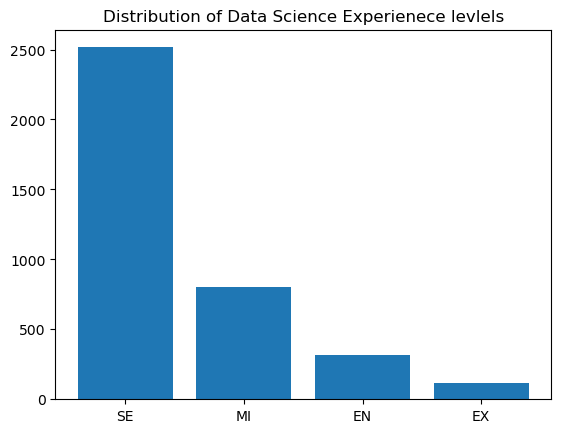

In [11]:
#let's plot the distribution of difference experience levels  
level_counts = ds['experience_level'].value_counts()

plt.bar(level_counts.index,level_counts.values)
plt.title('Distribution of Data Science Experienece levlels')

Text(0.5, 1.0, 'Distribution of Data Science Salaries')

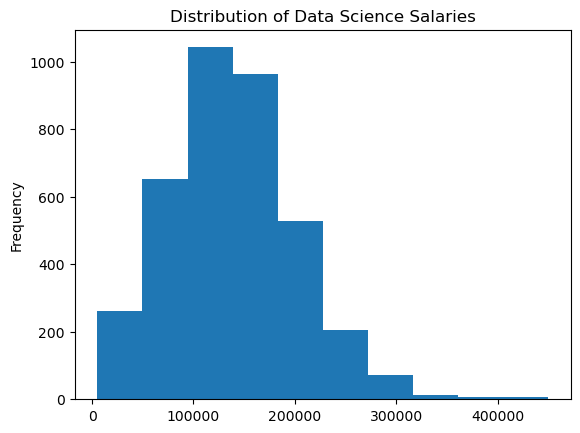

In [12]:
#histogram of salaries (in USD) in this dataset 
ds['salary_in_usd'].plot.hist() 
plt.title('Distribution of Data Science Salaries') # a pretty normal distribution, skewed a bit right 
#add average vertical line 

## PART II: 3 Questions about the Data  

### 1.  What are the outliers in this dataset ? 

<Axes: >

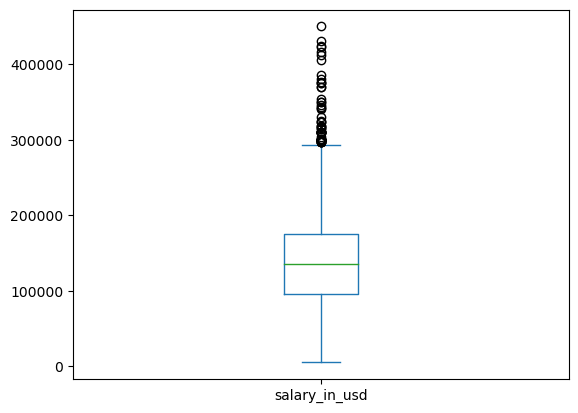

In [13]:
ds['salary_in_usd'].plot.box() 





In [14]:
#which job titles belong to these outliers? 


#anything above Q3 +1.5*IQR is an outlier 

 #first we must calculate quartiles: 
q1 = np.percentile(ds['salary_in_usd'], 25)
q3 = np.percentile(ds['salary_in_usd'], 75)
iqr = q3-q1

#now that we have quartiles, we can calculate the upper bound (the 'whisker'): 

upper_bound = q3 + 1.5*iqr # $295,000 is the upper bound

#we will now filter dataset for salaries in USD above 295k: 

outliers = ds[ds['salary_in_usd'] > upper_bound] # there are 63 outlier salaries. 
outliers


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group,experience_number
33,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,0,US,M,Engineer,3
68,2023,SE,FT,Applied Scientist,309400,USD,309400,US,0,US,L,Scientist,3
83,2022,EN,FT,AI Developer,300000,USD,300000,IN,50,IN,L,Other,1
133,2023,SE,FT,Machine Learning Engineer,342300,USD,342300,US,0,US,L,Engineer,3
145,2023,SE,FT,Machine Learning Engineer,318300,USD,318300,US,100,US,M,Engineer,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M,Scientist,2
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S,Scientist,4
3697,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L,Other,4
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,Scientist,2


In [15]:
# Is there a common job title / location among these outliers ? 

#grouping by job title: 
outliers.groupby('job_title').size()


job_title
AI Developer                           1
AI Scientist                           1
Applied Data Scientist                 1
Applied Machine Learning Scientist     1
Applied Scientist                      3
Computer Vision Engineer               1
Data Analyst                           2
Data Analytics Lead                    1
Data Architect                         2
Data Engineer                         16
Data Science Manager                   7
Data Science Tech Lead                 1
Data Scientist                        10
Director of Data Science               2
Head of Data                           1
Head of Data Science                   1
Machine Learning Engineer              6
Machine Learning Software Engineer     1
Principal Data Scientist               1
Research Scientist                     4
dtype: int64

In [16]:
#looks like data engineers are most well paid
outliers[outliers['job_title'] == 'Data Engineer']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group,experience_number
860,2023,EX,FT,Data Engineer,310000,USD,310000,US,100,US,M,Engineer,4
1007,2023,EX,FT,Data Engineer,310000,USD,310000,US,100,US,M,Engineer,4
1153,2023,EX,FT,Data Engineer,310000,USD,310000,US,100,US,M,Engineer,4
1427,2023,EX,FT,Data Engineer,310000,USD,310000,US,100,US,M,Engineer,4
1458,2023,SE,FT,Data Engineer,300000,USD,300000,US,0,US,M,Engineer,3
1593,2023,SE,FT,Data Engineer,300000,USD,300000,US,0,US,M,Engineer,3
1722,2023,SE,FT,Data Engineer,310000,USD,310000,US,0,US,M,Engineer,3
1932,2022,EX,FT,Data Engineer,310000,USD,310000,US,100,US,M,Engineer,4
2162,2022,SE,FT,Data Engineer,300000,USD,300000,US,0,US,M,Engineer,3
2279,2022,EX,FT,Data Engineer,310000,USD,310000,US,100,US,M,Engineer,4


### 2.  What is the difference in average salary (in USD) between US and EUROZONE salaries? 

In [17]:

#we want to know if people in the US or EU get paid more
#theres a few ways to do this calculation but to keep it fair, I think its
#best to calculate the two averages after filtering for the same job
#and same level
#experience_level, job_title, employment_type, salary_currency, salary_in_usd

ds2=ds[ds['job_title']=='Data Scientist']

#now we have a df with all the data science jobs

ds2=ds2[ds2['employment_type']=='FT']

#now we have a df with all the ds jobs that are full time (ft)

ds2=ds2[ds2['experience_level']=='EN']

#now it is entry level

us_mean=round(ds2[ds2['salary_currency']=='USD']['salary_in_usd'].mean(),2)

eu_mean=round(ds2[ds2['salary_currency']=='EUR']['salary_in_usd'].mean(),2)

print('The mean salary in the US is: $',us_mean,'while in the EU it is: $',eu_mean)

The mean salary in the US is: $ 98608.26 while in the EU it is: $ 49702.6


### 3.  Finding the median salaries for different job groups based on title

Text(0.5, 1.0, 'Median Salary of Data Science Job Groups by Title')

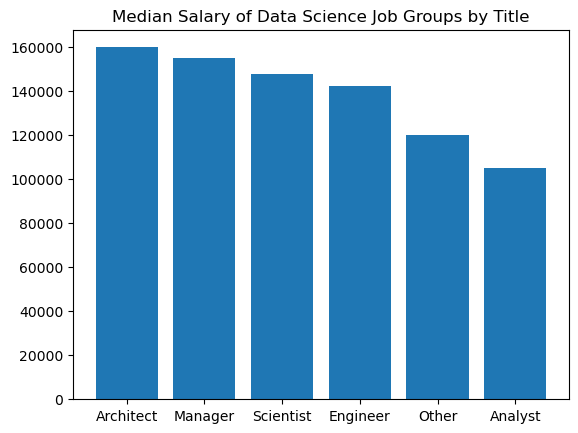

In [18]:
# Which job group has the highest median salary?

group_salaries = ds.groupby('job_group').median(numeric_only = True).salary.sort_values(ascending = False)

plt.bar(group_salaries.index,group_salaries.values)
plt.title('Median Salary of Data Science Job Groups by Title')

In [19]:
group_salaries

job_group
Architect    160000.0
Manager      155000.0
Scientist    148000.0
Engineer     142200.0
Other        120000.0
Analyst      105000.0
Name: salary, dtype: float64

Turns out Data Architects have the highest median salary at 160,000 USD, and data analysts have the lowest at 105,000 USD. 